In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns

In [2]:
path = ("C:/Users/Belema Amah/Downloads/QVI_purchase_behaviour.csv")

In [3]:
pur = pd.read_csv(path)

In [4]:
pur.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
path = ("C:/Users/Belema Amah/Downloads/QVI_transaction_data.xlsx")

In [6]:
tran = pd.read_excel(path)

In [7]:
tran.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [8]:
pur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [9]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


## check for null data 

In [10]:
tran.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

no missing data

## Checking for outliers

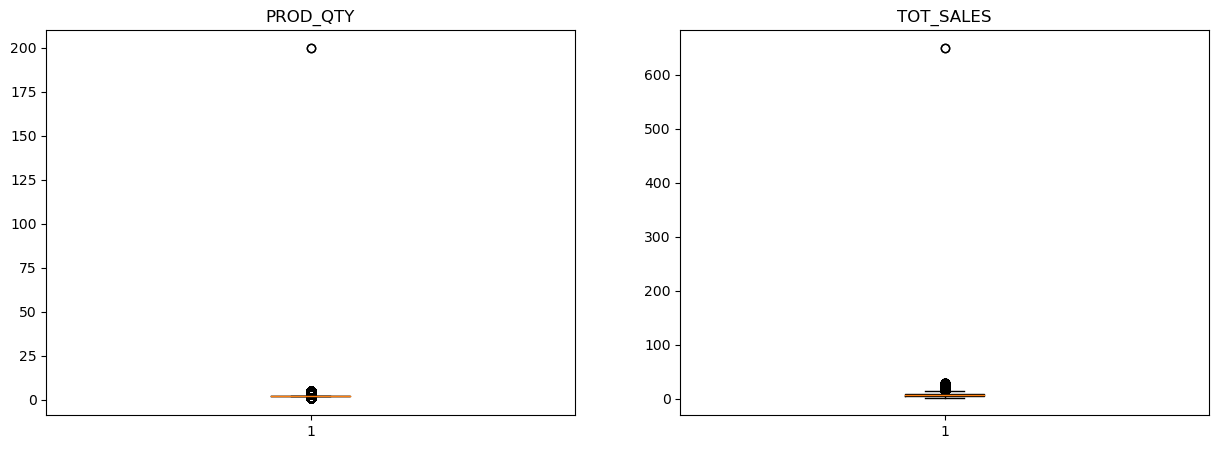

In [11]:
#using a Botplox to check for outliers in the PROD_QTY and the TOT_SALES

figure, axis=plt.subplots(1, 2, figsize=(15, 5))
axis[0].boxplot(tran["PROD_QTY"])
axis[1].boxplot(tran["TOT_SALES"])
axis[0].set_title("PROD_QTY")
axis[1].set_title("TOT_SALES")
plt.show()

we can see that their are outliers so we have to remove them

In [12]:
# we will us the describe method to get their details so we know what to remove
tran['PROD_QTY'].describe()

count    264836.000000
mean          1.907309
std           0.643654
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64

In [13]:
tran['TOT_SALES'].describe()

count    264836.000000
mean          7.304200
std           3.083226
min           1.500000
25%           5.400000
50%           7.400000
75%           9.200000
max         650.000000
Name: TOT_SALES, dtype: float64

In [14]:
tran = tran[tran['PROD_QTY']<5]
tran = tran[tran['TOT_SALES']<30]
tran=tran.reset_index(drop=True)    #   Resetting the index of the pandas.DataFrame.
tran

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
4,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
...,...,...,...,...,...,...,...,...
264379,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264380,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264381,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264382,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [15]:
# changing date to datetime
tran["DATE"]=pd.to_datetime(tran["DATE"], origin = "1899-12-30",unit="D")

In [16]:
tran

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
4,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
...,...,...,...,...,...,...,...,...
264379,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264380,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264381,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264382,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


with our transaction data in good form, we can now work on our purchase data

In [17]:
pur

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [18]:
pur.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

since the purchase dataframe looks ok we can go ahead and merge them on "LYLTY_CARD_NBR" since it is common in both

In [19]:
df = pd.merge(tran, pur, on="LYLTY_CARD_NBR")
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264379,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264380,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264381,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264382,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


lets find the total number of distinct products purchased

In [20]:
unique_products=list(df["PROD_NAME"].unique())   #   Storing the distinct products from the pandas.DataFrame into a list.
print("Total Distinct Products:", len(unique_products))

Total Distinct Products: 114


In [21]:
df["PROD_NAME_CLEAN"]=df["PROD_NAME"].str.replace("\d+g", "") #   Removing the package sizes from the product names, and storing them in a separate column.
df["PROD_SIZE"]=df["PROD_NAME"].str.extract("(\d+)")    #   Extracting the package sizes from the product names, and storing them in a separate column. 
df["PROD_NAME"]=df["PROD_NAME_CLEAN"] #   Assigning the PROD_NAME_CLEAN column to the PROD_NAME column.
df=df.drop("PROD_NAME_CLEAN", axis=1) #   Dropping the PROD_NAME_CLEAN column from the pandas.DataFrame.
df["BRAND_NAME"]=df["PROD_NAME"].str.split().str[0]    #   Extracting the brand names from the product names, and storing them in a separate column.
df=df.loc[:, ["DATE", "STORE_NBR", "LYLTY_CARD_NBR", "TXN_ID", "PROD_NBR", "PROD_NAME", "PROD_SIZE", "BRAND_NAME", "PROD_QTY", "TOT_SALES", "LIFESTAGE", "PREMIUM_CUSTOMER"]]   #   Rearranging the columns of the pandas.DataFrame.
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,175,Natural,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,175,CCs,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,160,WW,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,175,CCs,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,170,Smiths,2,2.9,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264379,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,175,Kettle,2,10.8,YOUNG SINGLES/COUPLES,Premium
264380,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,175,Tostitos,1,4.4,YOUNG SINGLES/COUPLES,Premium
264381,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,170,Doritos,2,8.8,YOUNG SINGLES/COUPLES,Premium
264382,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,150,Doritos,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [22]:
df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_SIZE           0
BRAND_NAME          0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [23]:
df=df.sort_values(by="DATE")  #   Sorting the pandas.DataFrame in ascending order of the DATE column.
df=df.reset_index(drop=True)  #   Resetting the index of the pandas.DataFrame.
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,219,219154,218894,43,Smith Crinkle Cut Bolognese 150g,150,Smith,2,5.2,OLDER FAMILIES,Budget
1,2018-07-01,247,247171,249667,103,RRD Steak & Chimuchurri 150g,150,RRD,2,5.4,MIDAGE SINGLES/COUPLES,Mainstream
2,2018-07-01,213,213027,212002,75,Cobs Popd Sea Salt Chips 110g,110,Cobs,2,7.6,YOUNG FAMILIES,Premium
3,2018-07-01,105,105223,106659,65,Old El Paso Salsa Dip Chnky Tom Ht300g,300,Old,2,10.2,MIDAGE SINGLES/COUPLES,Premium
4,2018-07-01,222,222173,222477,61,Smiths Crinkle Cut Chips Chicken 170g,170,Smiths,2,5.8,OLDER FAMILIES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264379,2019-06-30,104,104100,104327,18,Cheetos Chs & Bacon Balls 190g,190,Cheetos,2,6.6,OLDER SINGLES/COUPLES,Mainstream
264380,2019-06-30,41,41045,37960,57,Old El Paso Salsa Dip Tomato Mild 300g,300,Old,1,5.1,YOUNG SINGLES/COUPLES,Premium
264381,2019-06-30,55,55142,49322,78,Thins Chips Salt & Vinegar 175g,175,Thins,2,6.6,RETIREES,Mainstream
264382,2019-06-30,249,249371,251292,57,Old El Paso Salsa Dip Tomato Mild 300g,300,Old,1,5.1,YOUNG SINGLES/COUPLES,Budget


Now that we have the pandas.DataFrame sorted according to the date, we can analyse the dataset with regards to the change over time. However, before we can do that, we need to make sure that the DATE column contains no missing values for unrecorded dates.

In [24]:
ts = pd.date_range(start="2018-07-01", end="2019-06-30").difference(df["DATE"])   #   Checking for any missing dates in the pandas.DataFrame.
ts

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

As suspected, there is one unrecorded date and that's for Christmas Day, since most stores are closed during that time. Hence, we can fill in the value for this as having zero sales on the date.

let's start by visualising the change in total sales over the entire recorded duration

In [25]:
date_sales=df.groupby("DATE")["TOT_SALES"].sum().reset_index()   #   Grouping the pandas.DataFrame by the TOT_SALES column for each recorded date.
date_sales

,DATE,TOT_SALES
0,2018-07-01,5372.2
1,2018-07-02,5315.4
2,2018-07-03,5321.8
3,2018-07-04,5309.9
4,2018-07-05,5080.9
...,...,...
359,2019-06-26,5305.0
360,2019-06-27,5202.8
361,2019-06-28,5299.6
362,2019-06-29,5497.6


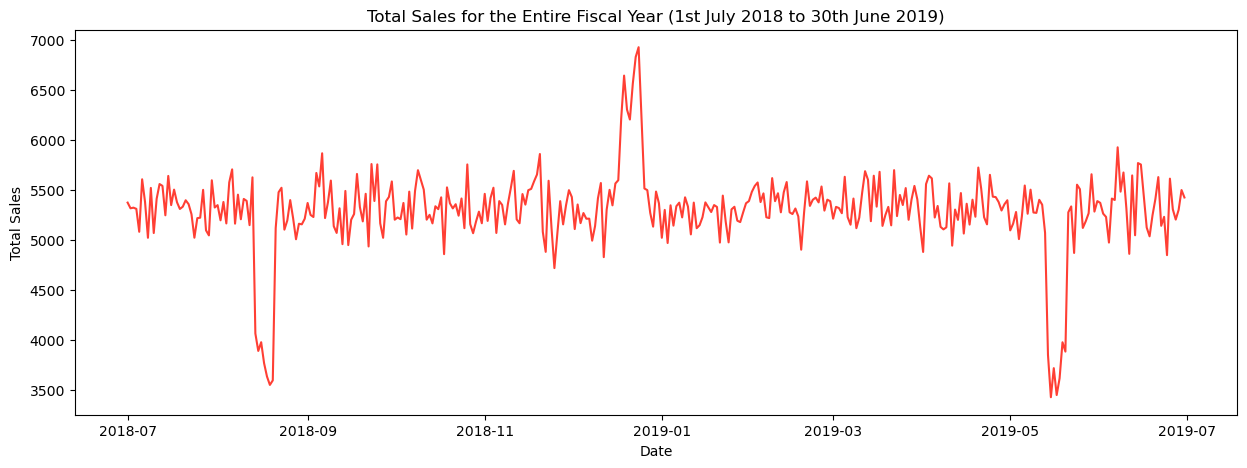

In [26]:
plt.figure(figsize=(15, 5))
plt.plot(date_sales["DATE"], date_sales["TOT_SALES"], color="#ff3f34")
plt.title("Total Sales for the Entire Fiscal Year (1st July 2018 to 30th June 2019)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


As we can see from the line graph, the sales drop to zero on a certain date, which is 25th December 2018 — Christmas Day, which we manually set to zero. However, the sales also reached an all-time high right before that, so we would need to analyse the transaction data for December 2018 to find out more about the sales.

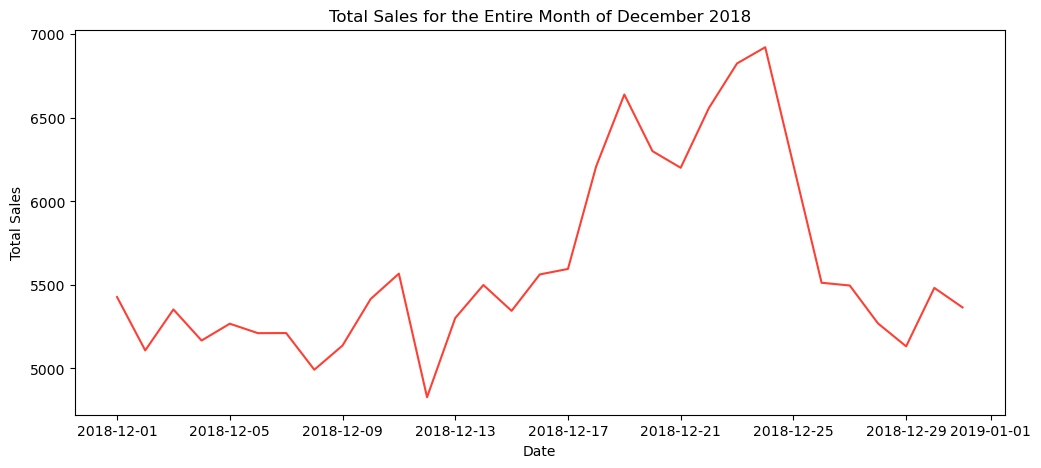

In [27]:
#   Plotting a line graph of the total sales for each recorded date during December 2018.

plt.figure(figsize=(12, 5))
plt.plot(date_sales["DATE"][date_sales["DATE"].dt.month==12], date_sales["TOT_SALES"][date_sales["DATE"].dt.month==12], color="#ff3f34")
plt.title("Total Sales for the Entire Month of December 2018")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


As suspected, the sales reached an all-time high the day before Christmas Day, which makes sense because people tend to purchase food items more when approaching holiday season. We can also see a consistent rise in the line graph between 21st December and 24th December, which means that these are the dates the store could target with promotions and discounts to increase the sales even more.

If the store does want to target these dates, it would be important to know which package sizes sell the most to create promotions and discounts around them.

In [28]:
holiday_sales=df[(df["DATE"]>="2018-12-21") & (df["DATE"]<="2018-12-24")]  #   Extracting entries for the dates between 21st December 2018 and 24th December 2018.
holiday_sales=holiday_sales.sort_values(by="TOT_SALES") #   Sorting the pandas.DataFrame in ascending order of the TOT_SALES column.
holiday_sales=holiday_sales.reset_index(drop=True)  #   Resetting the index of the pandas.DataFrame.
holiday_sales

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-12-24,38,38005,34012,35,Woolworths Mild Salsa 300g,300,Woolworths,1,1.5,OLDER FAMILIES,Budget
1,2018-12-22,127,127448,130458,76,Woolworths Medium Salsa 300g,300,Woolworths,1,1.5,OLDER FAMILIES,Mainstream
2,2018-12-23,255,255077,254619,76,Woolworths Medium Salsa 300g,300,Woolworths,1,1.5,YOUNG FAMILIES,Budget
3,2018-12-22,136,136114,138499,35,Woolworths Mild Salsa 300g,300,Woolworths,1,1.5,OLDER SINGLES/COUPLES,Mainstream
4,2018-12-22,186,186218,188613,76,Woolworths Medium Salsa 300g,300,Woolworths,1,1.5,RETIREES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
3608,2018-12-24,245,245157,247591,4,Dorito Corn Chp Supreme 380g,380,Dorito,2,13.0,OLDER SINGLES/COUPLES,Mainstream
3609,2018-12-23,4,4172,3436,4,Dorito Corn Chp Supreme 380g,380,Dorito,2,13.0,YOUNG SINGLES/COUPLES,Mainstream
3610,2018-12-21,238,238369,243381,4,Dorito Corn Chp Supreme 380g,380,Dorito,2,13.0,MIDAGE SINGLES/COUPLES,Mainstream
3611,2018-12-21,165,165091,165812,4,Dorito Corn Chp Supreme 380g,380,Dorito,2,13.0,OLDER FAMILIES,Mainstream


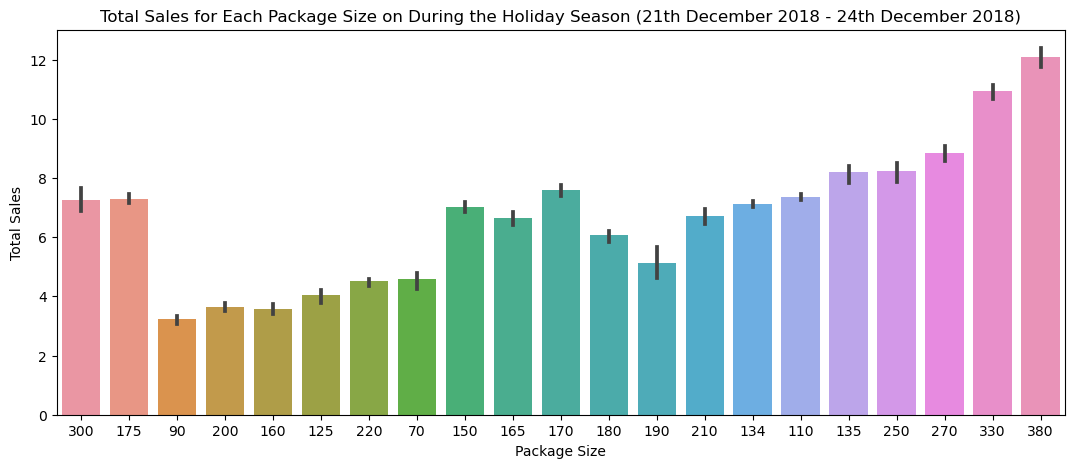

In [29]:
#   Plotting a bar graph of the total sales for each package size between 21st December 2018 and 24th December 2018.

plt.figure(figsize=(13, 5))
sns.barplot(x="PROD_SIZE", y="TOT_SALES", data=holiday_sales)
plt.title("Total Sales for Each Package Size on During the Holiday Season (21th December 2018 - 24th December 2018)")
plt.xlabel("Package Size")
plt.ylabel("Total Sales")
plt.show()

It seems like customers mostly purchased the 380 gramme package size (the largest one in the store) when approaching the holiday season.

Additionally, we can also find the brands that sold the most during the particular dates for brand-specific campaigns.

In [30]:
holiday_brands=holiday_sales.groupby("BRAND_NAME")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False).head(5)    #   Grouping the pandas.DataFrame by the TOT_SALES column for each brand, and sorting it in descending order of the TOT_SALES column.
holiday_brands=holiday_brands.reset_index(drop=True)    #   Resetting the index of the pandas.DataFrame.
holiday_brands

,BRAND_NAME,TOT_SALES
0,Kettle,4940.0
1,Doritos,2948.5
2,Smiths,2914.5
3,Pringles,2290.3
4,Thins,1343.1


We can see that KETTLE® was the highest-selling brand during the holiday season, so it'd be wise to surround promotions and discounts around it to drive sales even more.

Let's see if our holiday season statistics match with the ones during the entire duration of the recorded sales.

In [31]:
package_sales=df.groupby("PROD_SIZE")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False)   #   Grouping the pandas.DataFrame by the TOT_SALES column for each package size, and sorting it in descending order of the TOT_SALES column.
package_sales=package_sales.reset_index(drop=True)    #   Resetting the index of the pandas.DataFrame.
package_sales


,PROD_SIZE,TOT_SALES
0,175,483301.00
1,150,303066.30
2,134,176723.10
3,110,162176.40
4,170,146023.50
5,330,136452.30
6,300,112804.90
7,165,100954.60
8,380,75099.35
9,270,55126.40


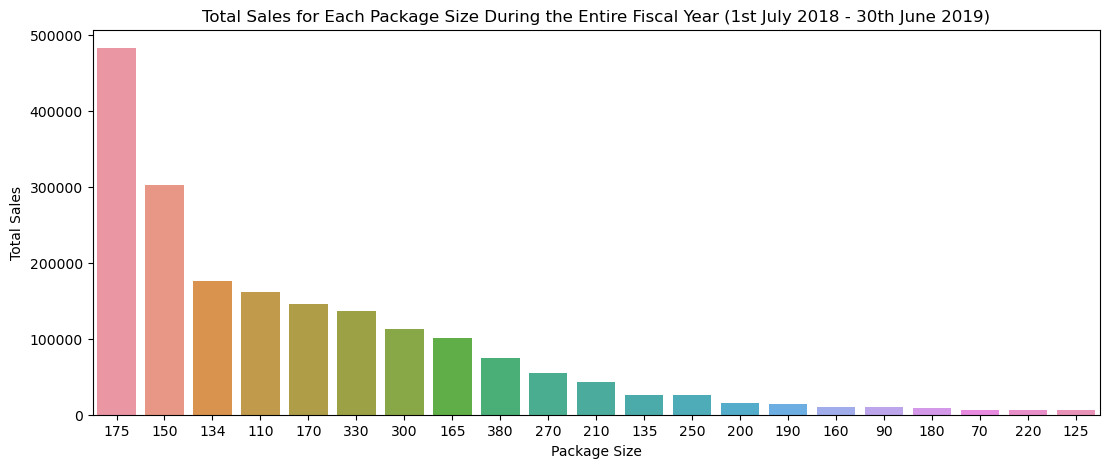

In [32]:
#   Plotting a bar graph of the total sales for each package size during the entire recorded duration.

plt.figure(figsize=(13, 5))
sns.barplot(x="PROD_SIZE", y="TOT_SALES", data=package_sales)
plt.title("Total Sales for Each Package Size During the Entire Fiscal Year (1st July 2018 - 30th June 2019)")
plt.xlabel("Package Size")
plt.ylabel("Total Sales")
plt.show()

As we can see, the 175 gramme package size was the highest-selling one over the entire duration of the recorded sales, and even that by nearly 37% from the second highest-selling package size. Hence, it's clear that the 175 gramme package size is a customer favourite!

Likewise, we can also check for the highest-selling brands during the entire duration of the recorded sales.

In [33]:
brand_sales=df.groupby("BRAND_NAME")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False)   #   Grouping the pandas.DataFrame by the TOT_SALES column for each package size, and sorting it in descending order of the TOT_SALES column.
brand_sales=brand_sales.reset_index(drop=True)    #   Resetting the index of the pandas.DataFrame.
brand_sales


,BRAND_NAME,TOT_SALES
0,Kettle,388592.80
1,Smiths,209277.80
2,Doritos,200802.40
3,Pringles,176723.10
4,Old,90417.90
5,Thins,88416.90
6,Twisties,81115.60
7,Tostitos,79503.60
8,Infuzions,75964.60
9,Cobs,70284.80


Just like the holiday season sales, KETTLE® remained the highest-selling brand during the entire duration of the recorded sales.

With the brand and product analysis done, we can move onto the customer analysis now. The first part would be analyse which sort of customers are the most loyal to the store, which would also be the ones that have the most purchases from it.

In [34]:
df["LIFESTAGE"].value_counts()

LIFESTAGE
OLDER SINGLES/COUPLES     54401
RETIREES                  49685
OLDER FAMILIES            48484
YOUNG FAMILIES            43499
YOUNG SINGLES/COUPLES     36340
MIDAGE SINGLES/COUPLES    25063
NEW FAMILIES               6912
Name: count, dtype: int64

In [35]:
customer_sales=df.groupby("LIFESTAGE")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False).head(7) #   Grouping the pandas.DataFrame by the TOT_SALES column for each lifestage, and sorting it in descending order of the TOT_SALES column.
customer_sales=customer_sales.reset_index(drop=True)    #   Resetting the index of the pandas.DataFrame.
customer_sales

,LIFESTAGE,TOT_SALES
0,OLDER SINGLES/COUPLES,400879.75
1,RETIREES,365058.65
2,OLDER FAMILIES,350492.25
3,YOUNG FAMILIES,314575.85
4,YOUNG SINGLES/COUPLES,259746.10
5,MIDAGE SINGLES/COUPLES,183886.55
6,NEW FAMILIES,50292.70


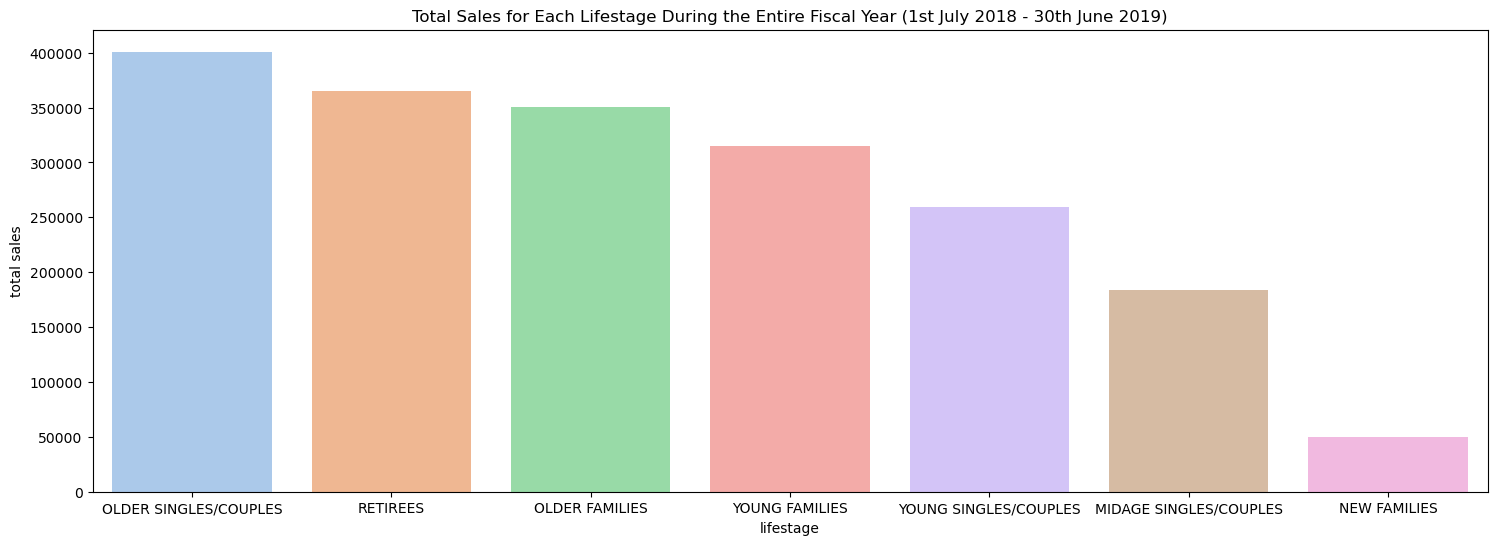

In [36]:
#   Plotting a bar graph of the total sales for each lifestage during the entire recorded duration.

plt.figure(figsize=(18, 6))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', data = customer_sales, palette='pastel')
plt.title("Total Sales for Each Lifestage During the Entire Fiscal Year (1st July 2018 - 30th June 2019)")
plt.xlabel('lifestage')
plt.ylabel('total sales')
plt.show()

It seems like OLDER SINGLES/COUPLES are the most loyal customers of the store and NEW FAMILIES are the least. Interestingly, we can see a decreasing trend of purchases according to age in the first half of the bar graph, with customers that are the most likely to spend the most time at home also having the most purchases, even though snack items wouldn't logically be associated with an age demographic.

In [37]:
lifestage_sales=df.groupby(["LIFESTAGE", "DATE"])["TOT_SALES"].sum().reset_index()  #   Grouping the pandas.DataFrame by the TOT_SALES column for each lifestage and date.
lifestage_sales=lifestage_sales[lifestage_sales["LIFESTAGE"]!="None"]   #   Removing the entries with the lifestage "None" from the pandas.DataFrame.
lifestage_sales

,LIFESTAGE,DATE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,2018-07-01,576.8
1,MIDAGE SINGLES/COUPLES,2018-07-02,589.5
2,MIDAGE SINGLES/COUPLES,2018-07-03,482.2
3,MIDAGE SINGLES/COUPLES,2018-07-04,604.5
4,MIDAGE SINGLES/COUPLES,2018-07-05,531.6
...,...,...,...
2543,YOUNG SINGLES/COUPLES,2019-06-26,687.4
2544,YOUNG SINGLES/COUPLES,2019-06-27,743.4
2545,YOUNG SINGLES/COUPLES,2019-06-28,840.7
2546,YOUNG SINGLES/COUPLES,2019-06-29,924.5


Let's see what sort of purchase behaviour each age demographic has!

In [38]:
lifestage_segment=df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index().sort_values(by=["LIFESTAGE", "TOT_SALES"], ascending=[True, False]) #   Grouping the pandas.DataFrame by the TOT_SALES column for each lifestage and customer segment, and sorting it in descending order of the TOT_SALES column.
lifestage_segment=lifestage_segment[lifestage_segment["LIFESTAGE"]!="None"] #   Removing the entries with the lifestage "None" from the pandas.DataFrame.
lifestage_segment=lifestage_segment.reset_index(drop=True)  #   Resetting the index of the pandas.DataFrame.
lifestage_segment

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Mainstream,90390.60
1,MIDAGE SINGLES/COUPLES,Premium,58152.15
2,MIDAGE SINGLES/COUPLES,Budget,35343.80
3,NEW FAMILIES,Budget,21868.95
4,NEW FAMILIES,Mainstream,16955.65
5,NEW FAMILIES,Premium,11468.10
6,OLDER FAMILIES,Budget,167496.75
7,OLDER FAMILIES,Mainstream,102829.10
8,OLDER FAMILIES,Premium,80166.40
9,OLDER SINGLES/COUPLES,Budget,136332.30


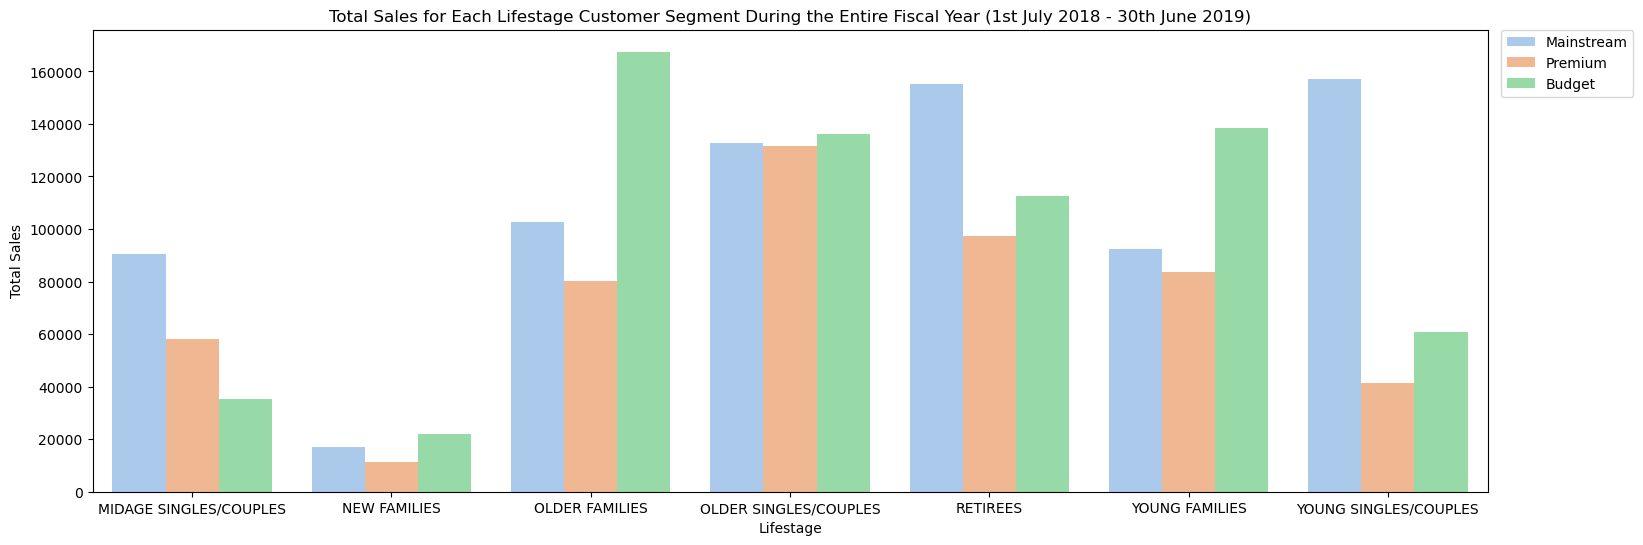

In [39]:
#   Plotting a bar graph of the total sales for each lifestage and whether it is a Premium, Mainstream, or Budget customer during the entire recorded duration.

plt.figure(figsize=(18, 6))
sns.barplot(x="LIFESTAGE", y="TOT_SALES", hue="PREMIUM_CUSTOMER", data=lifestage_segment, palette="pastel")
plt.title("Total Sales for Each Lifestage Customer Segment During the Entire Fiscal Year (1st July 2018 - 30th June 2019)")
plt.xlabel("Lifestage")
plt.ylabel("Total Sales")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()

We can see that MIDAGE SINGLES/COUPLES had the highest Mainstream and Premium purchases of all their purchases, while all the others had the least Premium purchases, which means that this would be the age demographic to target for payment plans and promotions to drive sales even more since they're more likely to pay more per packet of chips than the others.

Now that we know which age demographic the store should target to drive sales more, let's find which brand and package size each customer segment for MIDAGE SINGLES/COUPLES is the most inclined to.

In [40]:
lifestage_brands=df.groupby(["LIFESTAGE", "BRAND_NAME", "PREMIUM_CUSTOMER", "PROD_SIZE"])["TOT_SALES"].sum().reset_index().sort_values(by=["LIFESTAGE", "TOT_SALES"], ascending=[True, False])  #   Grouping the pandas.DataFrame by the TOT_SALES column for each lifestage and brand, and sorting it in descending order of the TOT_SALES column.
lifestage_brands=lifestage_brands[lifestage_brands["LIFESTAGE"]!="None"]    #   Removing the entries with the lifestage "None" from the pandas.DataFrame.
lifestage_brands=lifestage_brands.reset_index(drop=True)    #   Resetting the index of the pandas.DataFrame.
midage=lifestage_brands[lifestage_brands["LIFESTAGE"]=="MIDAGE SINGLES/COUPLES"]    #   Storing the entries for MIDAGE SINGLES/COUPLES into a separate pandas.DataFrame.
midage

,LIFESTAGE,BRAND_NAME,PREMIUM_CUSTOMER,PROD_SIZE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Kettle,Mainstream,175,10503.0
1,MIDAGE SINGLES/COUPLES,Kettle,Mainstream,150,8289.2
2,MIDAGE SINGLES/COUPLES,Pringles,Mainstream,134,8121.5
3,MIDAGE SINGLES/COUPLES,Kettle,Premium,175,5788.8
4,MIDAGE SINGLES/COUPLES,Pringles,Premium,134,5520.4
...,...,...,...,...,...
133,MIDAGE SINGLES/COUPLES,Snbts,Mainstream,90,120.7
134,MIDAGE SINGLES/COUPLES,Cheezels,Budget,125,105.0
135,MIDAGE SINGLES/COUPLES,Sunbites,Mainstream,90,103.7
136,MIDAGE SINGLES/COUPLES,Sunbites,Budget,90,96.9


With this, we can see that MIDAGE SINGLES/COUPLES prefer KETTLE® and 175 gramme package size the most in both the Mainstream and Premium customer segment.

### Recency, Frequency and Monetary (RFM) Analysis:

Recency, Frequency and Monetary (RFM) analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns. This can help us identify customers who are most valuable to the store, as well as those who may be at risk of churning.

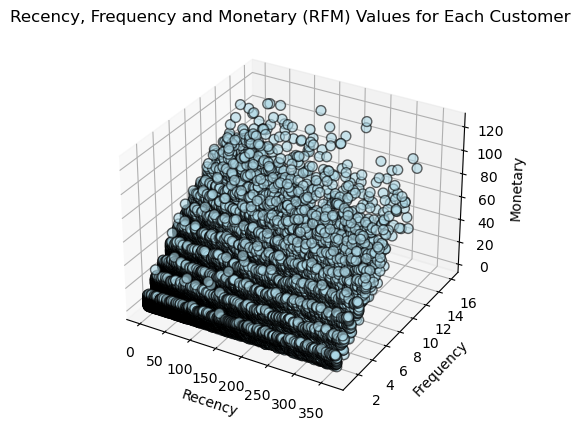

In [44]:
#   Creating a new pandas.DataFrame with the Recency, Frequency and Monetary (RFM) values for each customer based on the LYLTY_CARD_NBR.

rfm=df.groupby("LYLTY_CARD_NBR")["TOT_SALES"].agg(["sum", "count"]).reset_index()    #   Grouping the pandas.DataFrame by the TOT_SALES column for each customer, and aggregating the sum and count.
rfm.columns=["LYLTY_CARD_NBR", "MONETARY", "FREQUENCY"] #   Renaming the columns of the pandas.DataFrame.
rfm["RECENCY"]=(datetime.datetime.strptime("2019-06-30", "%Y-%m-%d")-df.groupby("LYLTY_CARD_NBR")["DATE"].max()).dt.days #   Calculating the Recency value for each customer.
rfm=rfm.dropna()    #   Dropping the null values from the pandas.DataFrame.
rfm=rfm.reset_index(drop=True)  #   Resetting the index of the pandas.DataFrame.

#   Plotting a three-dimensional scatter graph of the Recency, Frequency and Monetary (RFM) values for each customer.

figure=plt.figure(figsize=(15, 5))
axis=figure.add_subplot(111, projection="3d")
axis.scatter(rfm["RECENCY"], rfm["FREQUENCY"], rfm["MONETARY"], c="lightblue", s=50, alpha=0.6, edgecolors="black", linewidth=1, marker="o")
axis.set_xlabel("Recency")
axis.set_ylabel("Frequency")
axis.set_zlabel("Monetary")
plt.title("Recency, Frequency and Monetary (RFM) Values for Each Customer")
plt.show()

From the Recency, Frequency and Monetary (RFM) analysis, there don't seem to be many customers at risk of churning, but the scatter graph does suggest that the oldest customers may be most valuable to the store and the recent ones may likely be at risk of churning.

In [45]:
df.to_csv("QVI_data.csv", index=False)   #   Saving the finalised pandas.DataFrame as a CSV file.

### Conclusion:

* Generally, sales gradually increase during the holiday season and are the highest the day before Christmas Day, but suddenly decrease right after, so this would be the ideal time for any promotional campaigns or discounts.


* The 380 gramme package size, also the largest in the store, is the highest-selling package size during the holiday season with KETTLE® being the highest-selling brand.


* KETTLE® is the also the highest-selling brand during the entire year, but the 175 gramme package size is the highest-selling package size, on average, with a difference of nearly 37% from the second highest-selling package size.


* OLDER SINGLES/COUPLES are the most loyal customers of the store and NEW FAMILIES are the least


* MIDAGE SINGLES/COUPLES had the highest Mainstream and Premium purchases of all their purchases, while all the others had the least Premium purchases, which means that they're more likely to pay more per packet of chips than the others.


* MIDAGE SINGLES/COUPLES prefer KETTLE® and 175 gramme package size the most in both the Mainstream and Premium customer segment


* Oldest customers may be most valuable to the store and the recent ones may likely be at risk of churning
